In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Copy of clean_athlete_event.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
medal_counts = df.groupby('Team')['Medal'].value_counts()
print(medal_counts)


Team                          Medal 
Afghanistan                   Bronze     2
Algeria                       Bronze     6
                              Gold       5
                              Silver     4
Amateur Athletic Association  Gold       2
                                        ..
Yugoslavia                    Bronze    83
Zambia                        Silver     1
Zimbabwe                      Gold      17
                              Silver     4
                              Bronze     1
Name: Medal, Length: 517, dtype: int64


In [7]:
top_medalists = df[df['Medal'].notna()].groupby('Name')['Medal'].count().nlargest(10)
print(top_medalists)


Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Borys Anfiyanovych Shakhlin                        13
Ole Einar Bjrndalen                                13
Takashi Ono                                        13
Aleksey Yuryevich Nemov                            12
Birgit Fischer-Schmidt                             12
Dara Grace Torres (-Hoffman, -Minas)               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Name: Medal, dtype: int64


In [8]:
sports_count = df['Sport'].value_counts()

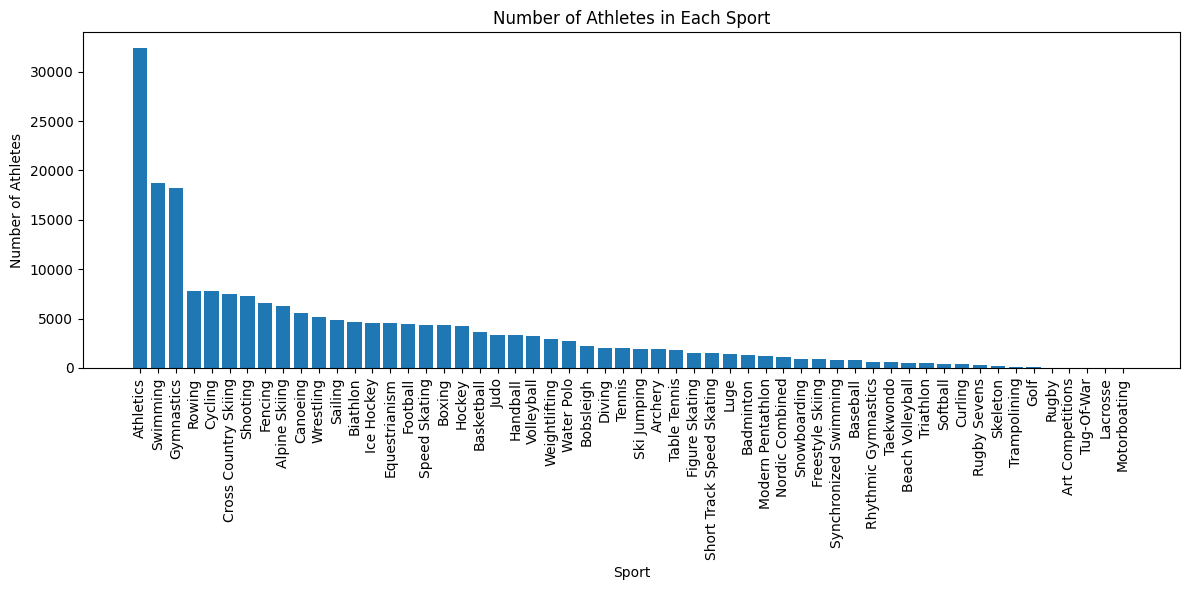

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(sports_count.index, sports_count.values)
plt.xticks(rotation=90)
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes in Each Sport')
plt.tight_layout()
plt.show()

In [10]:
fig1 = px.bar(x=sports_count.index, y=sports_count.values, labels={'x': 'Sport', 'y': 'Number of Athletes'},
              title='Number of Athletes in Each Sport')
fig1.update_xaxes(tickangle=45)

In [11]:
medal_counts_by_sport = df[df['Medal'].notna()]['Sport'].value_counts()

In [12]:
fig2 = px.bar(x=medal_counts_by_sport.index, y=medal_counts_by_sport.values, labels={'x': 'Sport', 'y': 'Number of Medals'},
              title='Number of Medals Won in Each Sport')
fig2.update_xaxes(tickangle=45)

In [13]:
chosen_sport = "Basketball"
filtered_df = df[df['Sport'] == chosen_sport]

In [14]:
fig = px.histogram(filtered_df, x='Age', nbins=20, labels={'Age': 'Age of Athletes'},
                   title=f'Distribution of Ages for Athletes in {chosen_sport}')


In [15]:
fig.update_layout(
    xaxis_title='Age of Athletes',
    yaxis_title='Number of Athletes',
    bargap=0.1,
    hovermode='closest',
    hoverlabel=dict(bgcolor="white", font_size=12),
)

In [16]:
chosen_sport = "Football"
football_df = df[df['Sport'] == chosen_sport]


In [17]:
fig = px.histogram(football_df, x='Age', nbins=20, labels={'Age': 'Age of Football Players'},
                   title=f'Distribution of Ages for Football Players')


In [18]:
fig.update_layout(
    xaxis_title='Age of Football Players',
    yaxis_title='Number of Players',
    bargap=0.1,
    hovermode='closest',
    hoverlabel=dict(bgcolor="white", font_size=12),
)

# Show the plot
fig.show()

In [19]:
print("Available sports:")
available_sports = df['Sport'].unique()
for i, sport in enumerate(available_sports, start=1):
    print(f"{i}. {sport}")

Available sports:
1. Basketball
2. Judo
3. Speed Skating
4. Cross Country Skiing
5. Ice Hockey
6. Badminton
7. Sailing
8. Biathlon
9. Gymnastics
10. Athletics
11. Alpine Skiing
12. Weightlifting
13. Wrestling
14. Luge
15. Rowing
16. Bobsleigh
17. Swimming
18. Football
19. Equestrianism
20. Shooting
21. Taekwondo
22. Boxing
23. Fencing
24. Diving
25. Canoeing
26. Handball
27. Water Polo
28. Tennis
29. Cycling
30. Hockey
31. Figure Skating
32. Softball
33. Archery
34. Volleyball
35. Synchronized Swimming
36. Modern Pentathlon
37. Table Tennis
38. Nordic Combined
39. Baseball
40. Rhythmic Gymnastics
41. Freestyle Skiing
42. Rugby Sevens
43. Trampolining
44. Beach Volleyball
45. Triathlon
46. Ski Jumping
47. Curling
48. Golf
49. Snowboarding
50. Short Track Speed Skating
51. Skeleton
52. Rugby
53. Tug-Of-War
54. Art Competitions
55. Lacrosse
56. Motorboating


In [20]:
chosen_sport_index = int(input("\nEnter the number corresponding to the sport you want to analyze: ")) - 1
chosen_sport = available_sports[chosen_sport_index]


Enter the number corresponding to the sport you want to analyze: 25


In [21]:
sport_df = df[df['Sport'] == chosen_sport]

In [22]:
gender_count = sport_df['Sex'].value_counts()
fig = px.pie(gender_count, names=gender_count.index, values=gender_count.values,
             title=f'Gender Distribution of Athletes in {chosen_sport}')


In [23]:
fig.show()

In [24]:
chosen_sport_index = int(input("\nEnter the number corresponding to the sport you want to analyze: ")) - 1
chosen_sport = available_sports[chosen_sport_index]


Enter the number corresponding to the sport you want to analyze: 32


In [25]:
sport_df = df[df['Sport'] == chosen_sport]

In [26]:
fig = px.histogram(sport_df, x='Age', nbins=20, labels={'Age': 'Age of Athletes'},
                   title=f'Distribution of Ages for Athletes in {chosen_sport}')

In [27]:
fig.update_layout(
    xaxis_title='Age of Athletes',
    yaxis_title='Number of Athletes',
    bargap=0.1,
    hovermode='closest',
    hoverlabel=dict(bgcolor="white", font_size=12),
)

In [28]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [29]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

<ipython-input-29-124f3a1fde49>:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-29-124f3a1fde49>:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [30]:
app = dash.Dash('Dashboard')


In [31]:
app.layout = html.Div([
    html.H1("Sports Analysis Dashboard"),
    html.Label("Select a sport:"),
    dcc.Dropdown(
        id='sport-dropdown',
        options=[{'label': sport, 'value': sport} for sport in df['Sport'].unique()],
        value=df['Sport'].unique()[0],
    ),
    dcc.Graph(id='age-distribution'),
    dcc.Graph(id='gender-distribution'),
])

In [32]:
@app.callback(
    Output('age-distribution', 'figure'),
    Output('gender-distribution', 'figure'),
    Input('sport-dropdown', 'value')
)
def update_graphs(chosen_sport):
    # Filter data for the chosen sport
    sport_df = df[df['Sport'] == chosen_sport]

In [33]:
age_fig = px.histogram(sport_df, x='Age', nbins=20, labels={'Age': 'Age of Athletes'},
                          title=f'Distribution of Ages for Athletes in {chosen_sport}')

In [34]:
gender_count = sport_df['Sex'].value_counts()
gender_fig = px.pie(gender_count, names=gender_count.index, values=gender_count.values,
                       title=f'Gender Distribution of Athletes in {chosen_sport}')



In [35]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [36]:
!pip install pywedge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00


In [37]:
import pywedge as pw

In [38]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [42]:
mc=pw.Pywedge_Charts(df,c=None, y="Sport")

/usr/local/lib/python3.10/dist-packages/pywedge/pywedge.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [45]:
chat=mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')